<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_5_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Customer Churn Prediction with Geodemographic Segmentation
# Importing Required Libraries
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Uploading and Loading the Dataset
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
# Loading the dataset
dataset = pd.read_csv("Churn_Modelling.csv")

# Displaying the first 5 rows
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Data Exploration
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Checking churn distribution
dataset['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [7]:
# Feature Selection
X = dataset.drop(columns=['CustomerId', 'Surname', 'Exited'])
y = dataset['Exited']

In [9]:
# Encoding Categorical Variables
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [11]:
# One-Hot Encoding - Geography
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), ['Geography'])
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [13]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Building the Artificial Neural Network
model = Sequential()

# First hidden layer
model.add(Dense(units=6, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(units=6, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compiling the ANN
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Training the ANN
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.1
)

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5762 - loss: 0.6824 - val_accuracy: 0.7950 - val_loss: 0.5310
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7879 - loss: 0.5235 - val_accuracy: 0.7950 - val_loss: 0.4870
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7919 - loss: 0.4806 - val_accuracy: 0.7975 - val_loss: 0.4596
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8047 - loss: 0.4514 - val_accuracy: 0.8112 - val_loss: 0.4384
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8032 - loss: 0.4440 - val_accuracy: 0.8200 - val_loss: 0.4226
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.4249 - val_accuracy: 0.8238 - val_loss: 0.4134
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8163 - loss: 0.4244 - val_accuracy: 0.8288 - val_loss: 0.4051
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8259 - loss: 0.4089 - val_accu

In [17]:
# Making Predictions on Test Data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
# Confusion Matrix & Accuracy
cm = confusion_matrix(y_test, y_pred)
cm

array([[1509,   86],
       [ 188,  217]])

In [19]:
accuracy_score(y_test, y_pred)

0.863

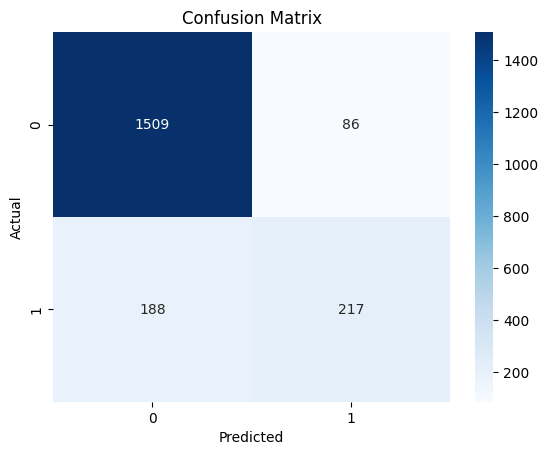

In [20]:
# Visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Prediction for a New Customer

Customer Details
•	Geography: France
•	Credit Score: 600
•	Gender: Male
•	Age: 40
•	Tenure: 3
•	Balance: 60000
•	Number of Products: 2
•	Has Credit Card: Yes
•	Active Member: Yes
•	Estimated Salary: 50000


In [21]:
# New customer data
new_customer = np.array([[1, 0, 0,   # Geography: France
                           600,      # Credit Score
                           1,        # Gender: Male
                           40,       # Age
                           3,        # Tenure
                           60000,    # Balance
                           2,        # Number of Products
                           1,        # Has Credit Card
                           1,        # Is Active Member
                           50000]])  # Estimated Salary

In [22]:
# Scaling the input
new_customer_scaled = sc.transform(new_customer)

# Prediction
prediction = model.predict(new_customer_scaled)

prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.09655507]], dtype=float32)

In [23]:
if prediction > 0.5:
    print("The customer is likely to leave the bank.")
else:
    print("The customer is more likely to stay with the bank.")

The customer is more likely to stay with the bank.


Should we say goodbye to this customer?

Well, According to the ANN prediction. The model chooses whether the customer is more likely to churn or remain loyal. This can allow the bank to take proactive retention actions.
